In [2]:
# Importing necessary libraries
import numpy as np  # Library for numerical operations
import pandas as pd  # Library for data manipulation and analysis
import seaborn as sns  # Library for statistical data visualization
import matplotlib.pyplot as plt  # Library for creating static, animated, and interactive visualizations
from scipy.stats import norm  # Module for statistical functions and probability distributions
from sklearn.preprocessing import StandardScaler  # Module for preprocessing data
from scipy import stats  # Module for statistics and mathematical functions
import warnings  # Module for handling warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# This part of the code is attempting to list all files under the input directory, which may not be applicable in this context

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
# These comments provide information about writing data to the working directory in a Kaggle environment
# Data is provided from kaggle

In [4]:
# Reading the CSV file into a DataFrame
# r prefix is used for raw string literal to avoid interpreting backslashes as escape characters
# This reads the CSV file located at the specified path
df_arrests = pd.read_csv(r"C:\Users\lalla\Downloads\Volunteering\Hack4LA\Hack4LA City of Los Angeles Arrests project\data sets\arrest-data-from-2010-to-present.csv")

In [5]:
# Displaying the first few rows of the DataFrame df_arrests
print("First few rows of the DataFrame:")
df_arrests.head()

First few rows of the DataFrame:


Report ID              Arrest Date    Time  Area ID    Area Name  \
0    5666847  2019-06-22T00:00:00.000  1630.0       14      Pacific   
1    5666688  2019-06-22T00:00:00.000  1010.0       10  West Valley   
2    5666570  2019-06-22T00:00:00.000   400.0       15  N Hollywood   
3    5666529  2019-06-22T00:00:00.000   302.0       17   Devonshire   
4    5666742  2019-06-22T00:00:00.000  1240.0       14      Pacific   

   Reporting District  Age Sex Code Descent Code  Charge Group Code  ...  \
0                1457   44        M            W               24.0  ...   
1                1061    8        M            O                NaN  ...   
2                1543   31        F            O               22.0  ...   
3                1738   23        F            W               22.0  ...   
4                1472   28        M            W                8.0  ...   

                  Charge Description  \
0                          VANDALISM   
1                                NaN   
2        DRUNK DRIVING ALCOHOL/DRUGS   
3        DRUNK DRIVING ALCOHOL/DRUGS   
4  OBSTRUCT/RESIST EXECUTIVE OFFICER   

                                    Address  \
0  12300    CULVER                       BL   
1  19000    VANOWEN                      ST   
2           MAGNOLIA                     AV   
3           HAYVENHURST                  ST   
4   6600    ESPLANADE                    ST   

                         Cross Street  \
0                                 NaN   
1                                 NaN   
2     LAUREL CANYON                BL   
3  N  REGAN                        FY   
4                                 NaN   

                                            Location Zip Codes Census Tracts  \
0  {'latitude': '33.992', 'human_address': '{"add...   24031.0         918.0   
1  {'latitude': '34.1687', 'human_address': '{"ad...   19339.0         321.0   
2  {'latitude': '34.1649', 'human_address': '{"ad...    8890.0         205.0   
3  {'latitude': '34.2692', 'human_address': '{"ad...   19329.0          69.0   
4  {'latitude': '33.9609', 'human_address': '{"ad...   25075.0         937.0   

  Precinct Boundaries  LA Specific Plans  Council Districts  \
0              1137.0               10.0               10.0   
1              1494.0                NaN                4.0   
2              1332.0               17.0                5.0   
3               388.0                NaN                2.0   
4               241.0               10.0               10.0   

   Neighborhood Councils (Certified)  
0                               85.0  
1                               10.0  
2                               39.0  
3                               78.0  
4                               16.0  

[5 rows x 23 columns]

In [6]:
# Obtaining the shape of the DataFrame df_arrests
# returns a tuple containing the number of rows and columns in the DataFrame

df_arrests.shape

(1048575, 23)

In [7]:
# Retrieving all column names of the DataFrame df_arrests
df_arrests.columns

Index(['Report ID', 'Arrest Date', 'Time', 'Area ID', 'Area Name',
       'Reporting District', 'Age', 'Sex Code', 'Descent Code',
       'Charge Group Code', 'Charge Group Description', 'Arrest Type Code',
       'Charge', 'Charge Description', 'Address', 'Cross Street', 'Location',
       'Zip Codes', 'Census Tracts', 'Precinct Boundaries',
       'LA Specific Plans', 'Council Districts',
       'Neighborhood Councils (Certified)'],
      dtype='object')

In [8]:
# Replacing spaces with underscores in the column names of the DataFrame df_arrests
# List comprehension iterates over each column name, replaces spaces with underscores, and assigns the modified column names back to the DataFrame
df_arrests.columns = [c.replace(' ', '_') for c in df_arrests.columns]

In [9]:
# Generating descriptive statistics for the 'Charge' column of the DataFrame df_arrests
# This method provides summary statistics such as count, unique values, top value, frequency of top value, and data type
df_arrests['Charge'].describe()

count        1048575
unique          7923
top       23152(A)VC
freq           78253
Name: Charge, dtype: object

In [10]:
# Displaying the first few rows of the 'Location' column of the DataFrame df_arrests
df_arrests['Location'].head()

0    {'latitude': '33.992', 'human_address': '{"add...
1    {'latitude': '34.1687', 'human_address': '{"ad...
2    {'latitude': '34.1649', 'human_address': '{"ad...
3    {'latitude': '34.2692', 'human_address': '{"ad...
4    {'latitude': '33.9609', 'human_address': '{"ad...
Name: Location, dtype: object

In [11]:
# Getting the data types of each column in the DataFrame df_arrests
print("\nData types of each column:")
df_arrests.dtypes


Data types of each column:


Report_ID                              int64
Arrest_Date                           object
Time                                 float64
Area_ID                                int64
Area_Name                             object
Reporting_District                     int64
Age                                    int64
Sex_Code                              object
Descent_Code                          object
Charge_Group_Code                    float64
Charge_Group_Description              object
Arrest_Type_Code                      object
Charge                                object
Charge_Description                    object
Address                               object
Cross_Street                          object
Location                              object
Zip_Codes                            float64
Census_Tracts                        float64
Precinct_Boundaries                  float64
LA_Specific_Plans                    float64
Council_Districts                    float64
Neighborho

In [12]:
# Generating descriptive statistics for numerical columns in the DataFrame df_arrests
print("\nDescriptive statistics for numerical columns:")
df_arrests.describe()


Descriptive statistics for numerical columns:


Report_ID          Time       Area_ID  Reporting_District  \
count  1.048575e+06  1.048404e+06  1.048575e+06        1.048575e+06   
mean   4.764235e+07  1.381327e+03  1.010429e+01        1.056901e+03   
std    6.599293e+07  6.644978e+02  6.208311e+00        6.192820e+02   
min    0.000000e+00  0.000000e+00  1.000000e+00        1.000000e+02   
25%    3.796494e+06  9.350000e+02  5.000000e+00        5.130000e+02   
50%    4.825928e+06  1.505000e+03  1.000000e+01        1.063000e+03   
75%    1.213046e+08  1.925000e+03  1.500000e+01        1.529000e+03   
max    9.921099e+08  2.400000e+03  2.100000e+01        2.199000e+03   

                Age  Charge_Group_Code     Zip_Codes  Census_Tracts  \
count  1.048575e+06      971863.000000  1.048053e+06   1.039389e+06   
mean   3.459435e+01          15.954220  2.060402e+04   5.633290e+02   
std    1.356740e+01           7.089008  5.726324e+03   3.801320e+02   
min    0.000000e+00           1.000000  2.436000e+03   1.000000e+00   
25%    2.400000e+01           8.000000  1.973000e+04   3.060000e+02   
50%    3.200000e+01          17.000000  2.307500e+04   5.370000e+02   
75%    4.500000e+01          22.000000  2.366800e+04   7.430000e+02   
max    9.700000e+01          99.000000  2.732500e+04   2.343000e+03   

       Precinct_Boundaries  LA_Specific_Plans  Council_Districts  \
count         1.044487e+06      360799.000000       1.041263e+06   
mean          8.632621e+02          10.097886       8.551042e+00   
std           3.641505e+02           7.696808       3.951870e+00   
min           1.000000e+00           1.000000       1.000000e+00   
25%           5.270000e+02           7.000000       5.000000e+00   
50%           8.970000e+02           7.000000       9.000000e+00   
75%           1.172000e+03          10.000000       1.200000e+01   
max           1.560000e+03          54.000000       1.500000e+01   

       Neighborhood_Councils_(Certified)  
count                       1.008446e+06  
mean                        4.672848e+01  
std                         2.611213e+01  
min                         1.000000e+00  
25%                         2.600000e+01  
50%                         4.500000e+01  
75%                         7.300000e+01  
max                         9.500000e+01

In [13]:
# Calculating the mean age from the 'Age' column in the DataFrame df_arrests
# Mean age of arrests
df_arrests.Age.mean()

34.59435042796176

In [14]:
# Counting the number of non-null values in the 'Charge' column of the DataFrame df_arrests
df_arrests.Charge.count()

1048575

In [15]:
# Counting the frequency of each unique value in the 'Age' column of the DataFrame df_arrests
df_arrests.Age.value_counts()

22    37424
23    37247
21    36739
24    36601
25    35421
      ...  
92        5
94        5
93        4
96        4
97        1
Name: Age, Length: 97, dtype: int64

In [16]:
# Counting the frequency of each unique value in the 'Location' column of the DataFrame df_arrests
df_arrests.Location.value_counts()

{'latitude': '34.1837', 'human_address': '{"address": "", "city": "", "state": "", "zip": ""}', 'longitude': '-118.4465'}    7011
{'latitude': '34.0423', 'human_address': '{"address": "", "city": "", "state": "", "zip": ""}', 'longitude': '-118.2452'}    4371
{'latitude': '34.0601', 'human_address': '{"address": "", "city": "", "state": "", "zip": ""}', 'longitude': '-118.2761'}    4358
{'latitude': '34.1016', 'human_address': '{"address": "", "city": "", "state": "", "zip": ""}', 'longitude': '-118.3387'}    4121
{'latitude': '33.9708', 'human_address': '{"address": "", "city": "", "state": "", "zip": ""}', 'longitude': '-118.2783'}    3960
                                                                                                                             ... 
{'latitude': '34.2439', 'human_address': '{"address": "", "city": "", "state": "", "zip": ""}', 'longitude': '-118.5745'}       1
{'latitude': '34.0627', 'human_address': '{"address": "", "city": "", "state": "", "zip": 

In [17]:
# Counting the frequency of each unique value in the 'Area_Name' column of the DataFrame df_arrests
df_arrests.Area_Name.value_counts()

Central        110105
Hollywood       98345
Pacific         82898
77th Street     57719
Southwest       56720
Van Nuys        56109
Rampart         55572
Newton          55104
Mission         52530
N Hollywood     51449
Northeast       39641
Olympic         38894
Southeast       38425
Foothill        37020
Harbor          36779
Topanga         34620
Hollenbeck      34606
West Valley     32489
Devonshire      31763
Wilshire        25112
West LA         22675
Name: Area_Name, dtype: int64

In [18]:
# Counting the frequency of each unique value in the 'Charge_Description' column of the DataFrame df_arrests
df_arrests.Charge_Description.value_counts()

DRUNK DRIVING ALCOHOL/DRUGS                  77879
DRINKING IN PUBLIC                           68256
POSSESSION CONTROLLED SUBSTANCE              38512
CORPORAL INJURY ON SPOUSE/COHABITANT/ETC     38122
FTA AFTER WRITTEN PROMISE                    24867
                                             ...  
UNLAW SHIPMENTS:SHIPS/ETC                        1
PROCURE PERSON FROM PROSTITUTION                 1
EXCEEDING WRITTEN ESTIMATES                      1
FAIL TO DISCLOSE ORIGIN OF RECORDINGS            1
ACCESS COMPUTER TO DEFRAUD/DECEIVE/EXTORT        1
Name: Charge_Description, Length: 2178, dtype: int64

In [19]:
# Obtaining an array of unique values in the 'Area_Name' column of the DataFrame df_arrests
df_arrests.Area_Name.unique()

array(['Pacific', 'West Valley', 'N Hollywood', 'Devonshire', 'Mission',
       'Central', 'Southeast', '77th Street', 'West LA', 'Southwest',
       'Northeast', 'Hollywood', 'Harbor', 'Van Nuys', 'Foothill',
       'Hollenbeck', 'Newton', 'Wilshire', 'Topanga', 'Olympic',
       'Rampart'], dtype=object)

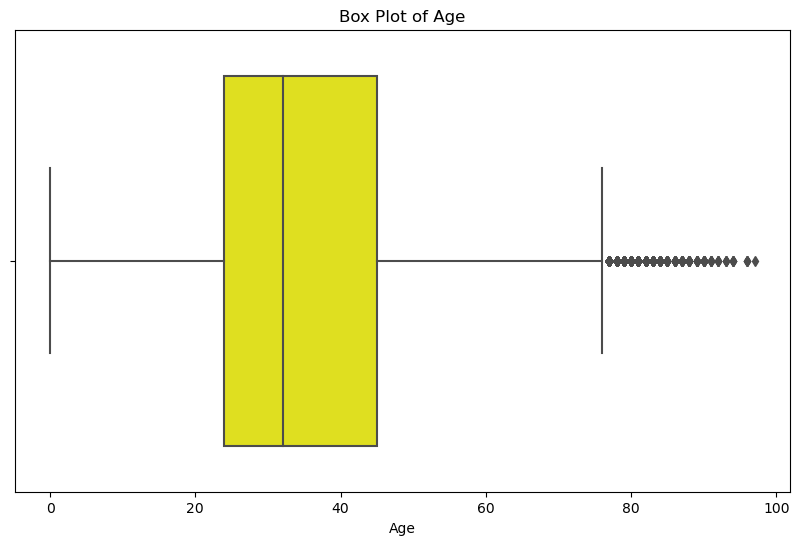

In [20]:
# Box plot of Age column
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', data=df_arrests, color='yellow')
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

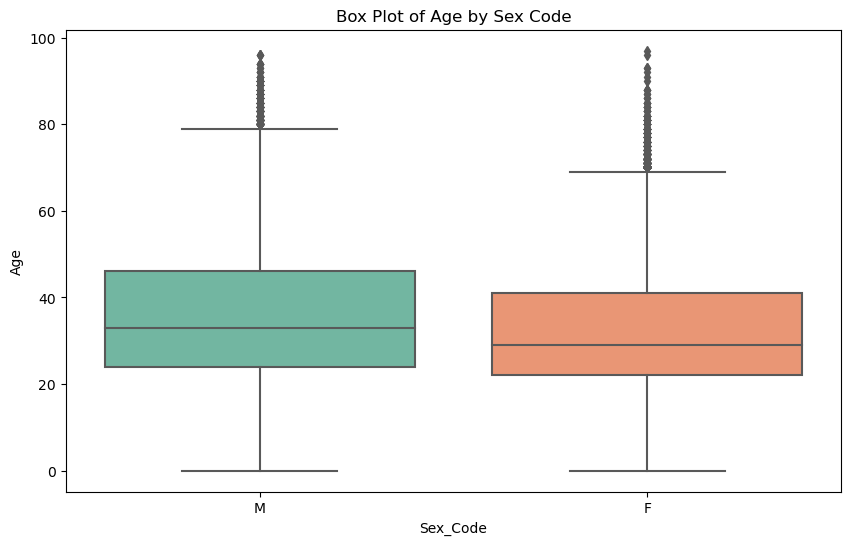

In [21]:
# Box plot of Sex Code column
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex_Code', y='Age', data=df_arrests, palette='Set2')
plt.title('Box Plot of Age by Sex Code')
plt.xlabel('Sex_Code')
plt.ylabel('Age')
plt.show()

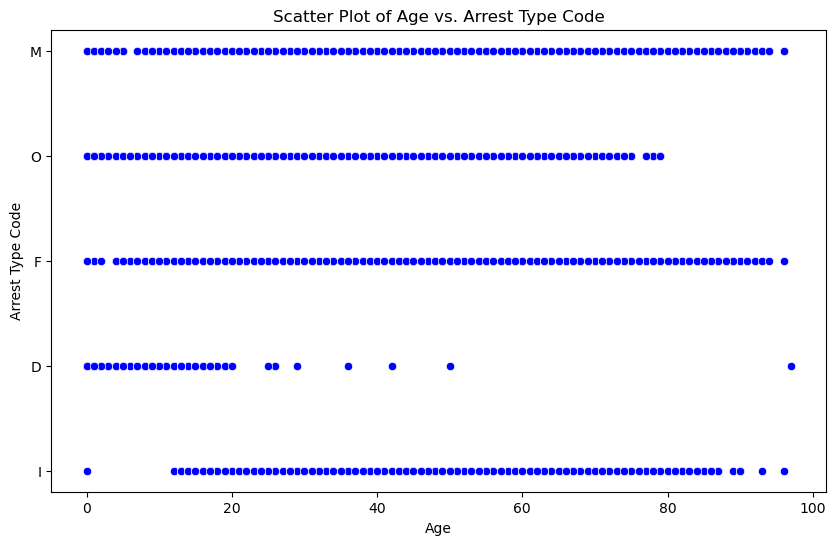

In [22]:
# Scatter plot of Age vs. Arrest Type Code
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Arrest_Type_Code', data=df_arrests, color='blue')
plt.title('Scatter Plot of Age vs. Arrest Type Code')
plt.xlabel('Age')
plt.ylabel('Arrest Type Code')
plt.show()


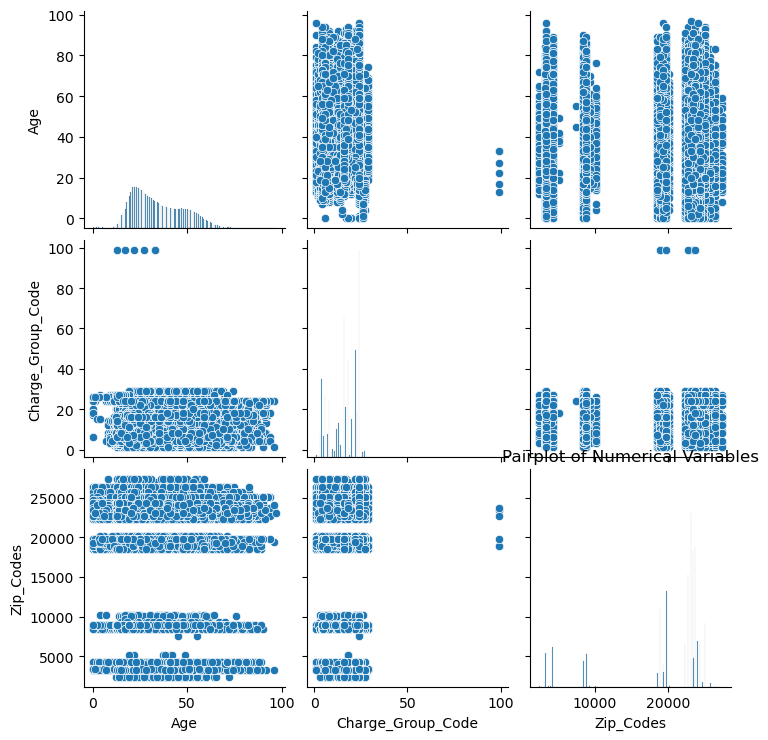

In [23]:
# Pairplot of numerical variables
sns.pairplot(df_arrests[['Age', 'Charge_Group_Code', 'Arrest_Type_Code', 'Zip_Codes']])
plt.title('Pairplot of Numerical Variables')
plt.show()

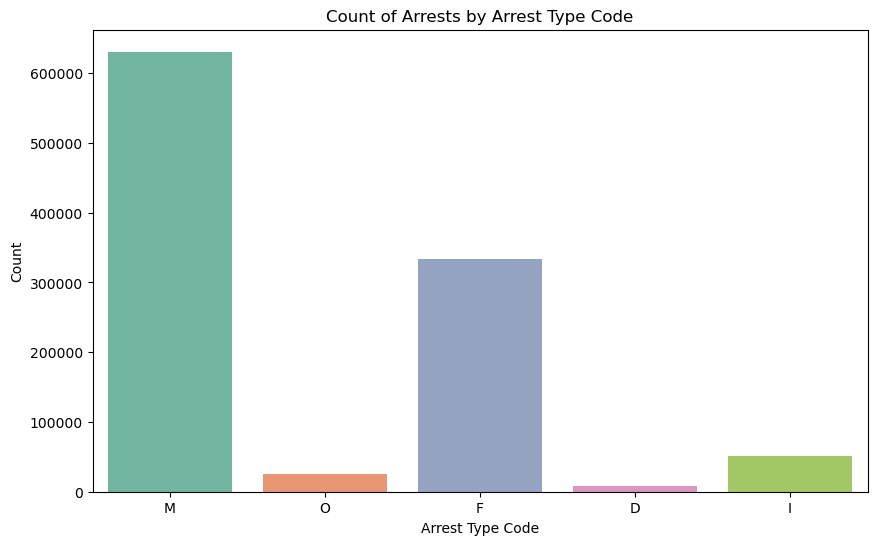

In [24]:
# Bar plot of Arrest Type Code
plt.figure(figsize=(10, 6))
sns.countplot(x='Arrest_Type_Code', data=df_arrests, palette='Set2')
plt.title('Count of Arrests by Arrest Type Code')
plt.xlabel('Arrest Type Code')
plt.ylabel('Count')
plt.show()


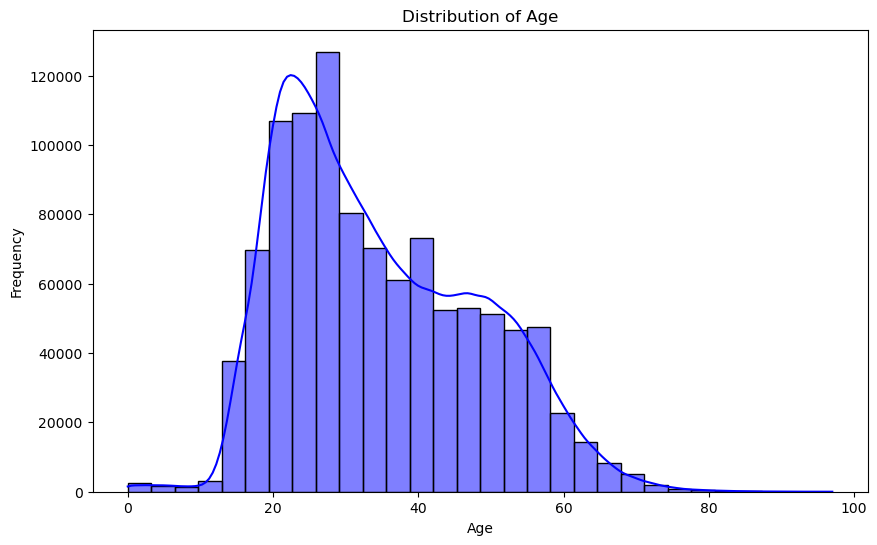

In [25]:
# Histogram with KDE for 'Age' column
plt.figure(figsize=(10, 6))
sns.histplot(df_arrests['Age'], kde=True, bins=30, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

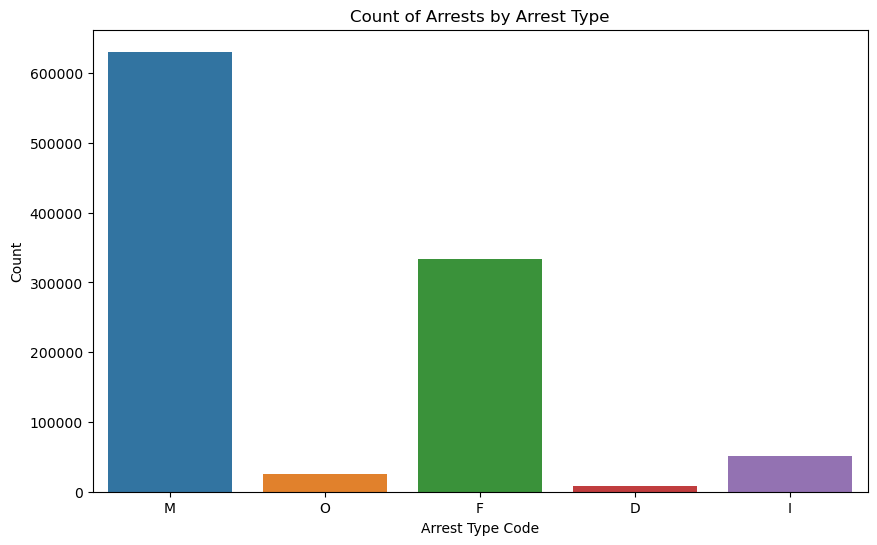

In [26]:
# Create countplot for 'Arrest_Type_Code'
plt.figure(figsize=(10, 6))
sns.countplot(x='Arrest_Type_Code', data=df_arrests)
plt.title('Count of Arrests by Arrest Type')
plt.xlabel('Arrest Type Code')
plt.ylabel('Count')
plt.show()

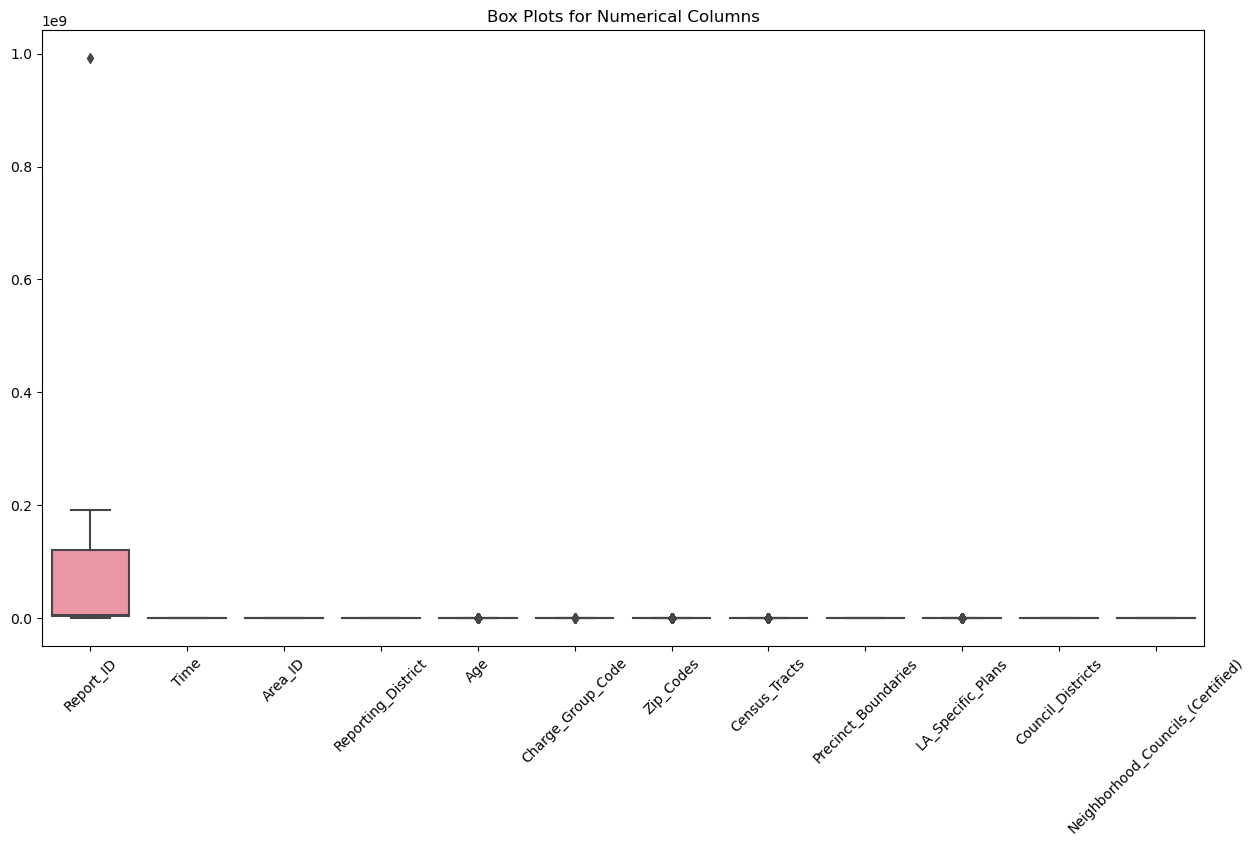

In [27]:
# Create box plots for numerical columns
numerical_columns = df_arrests.select_dtypes(include=np.number).columns
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_arrests[numerical_columns])
plt.title('Box Plots for Numerical Columns')
plt.xticks(rotation=45)
plt.show()


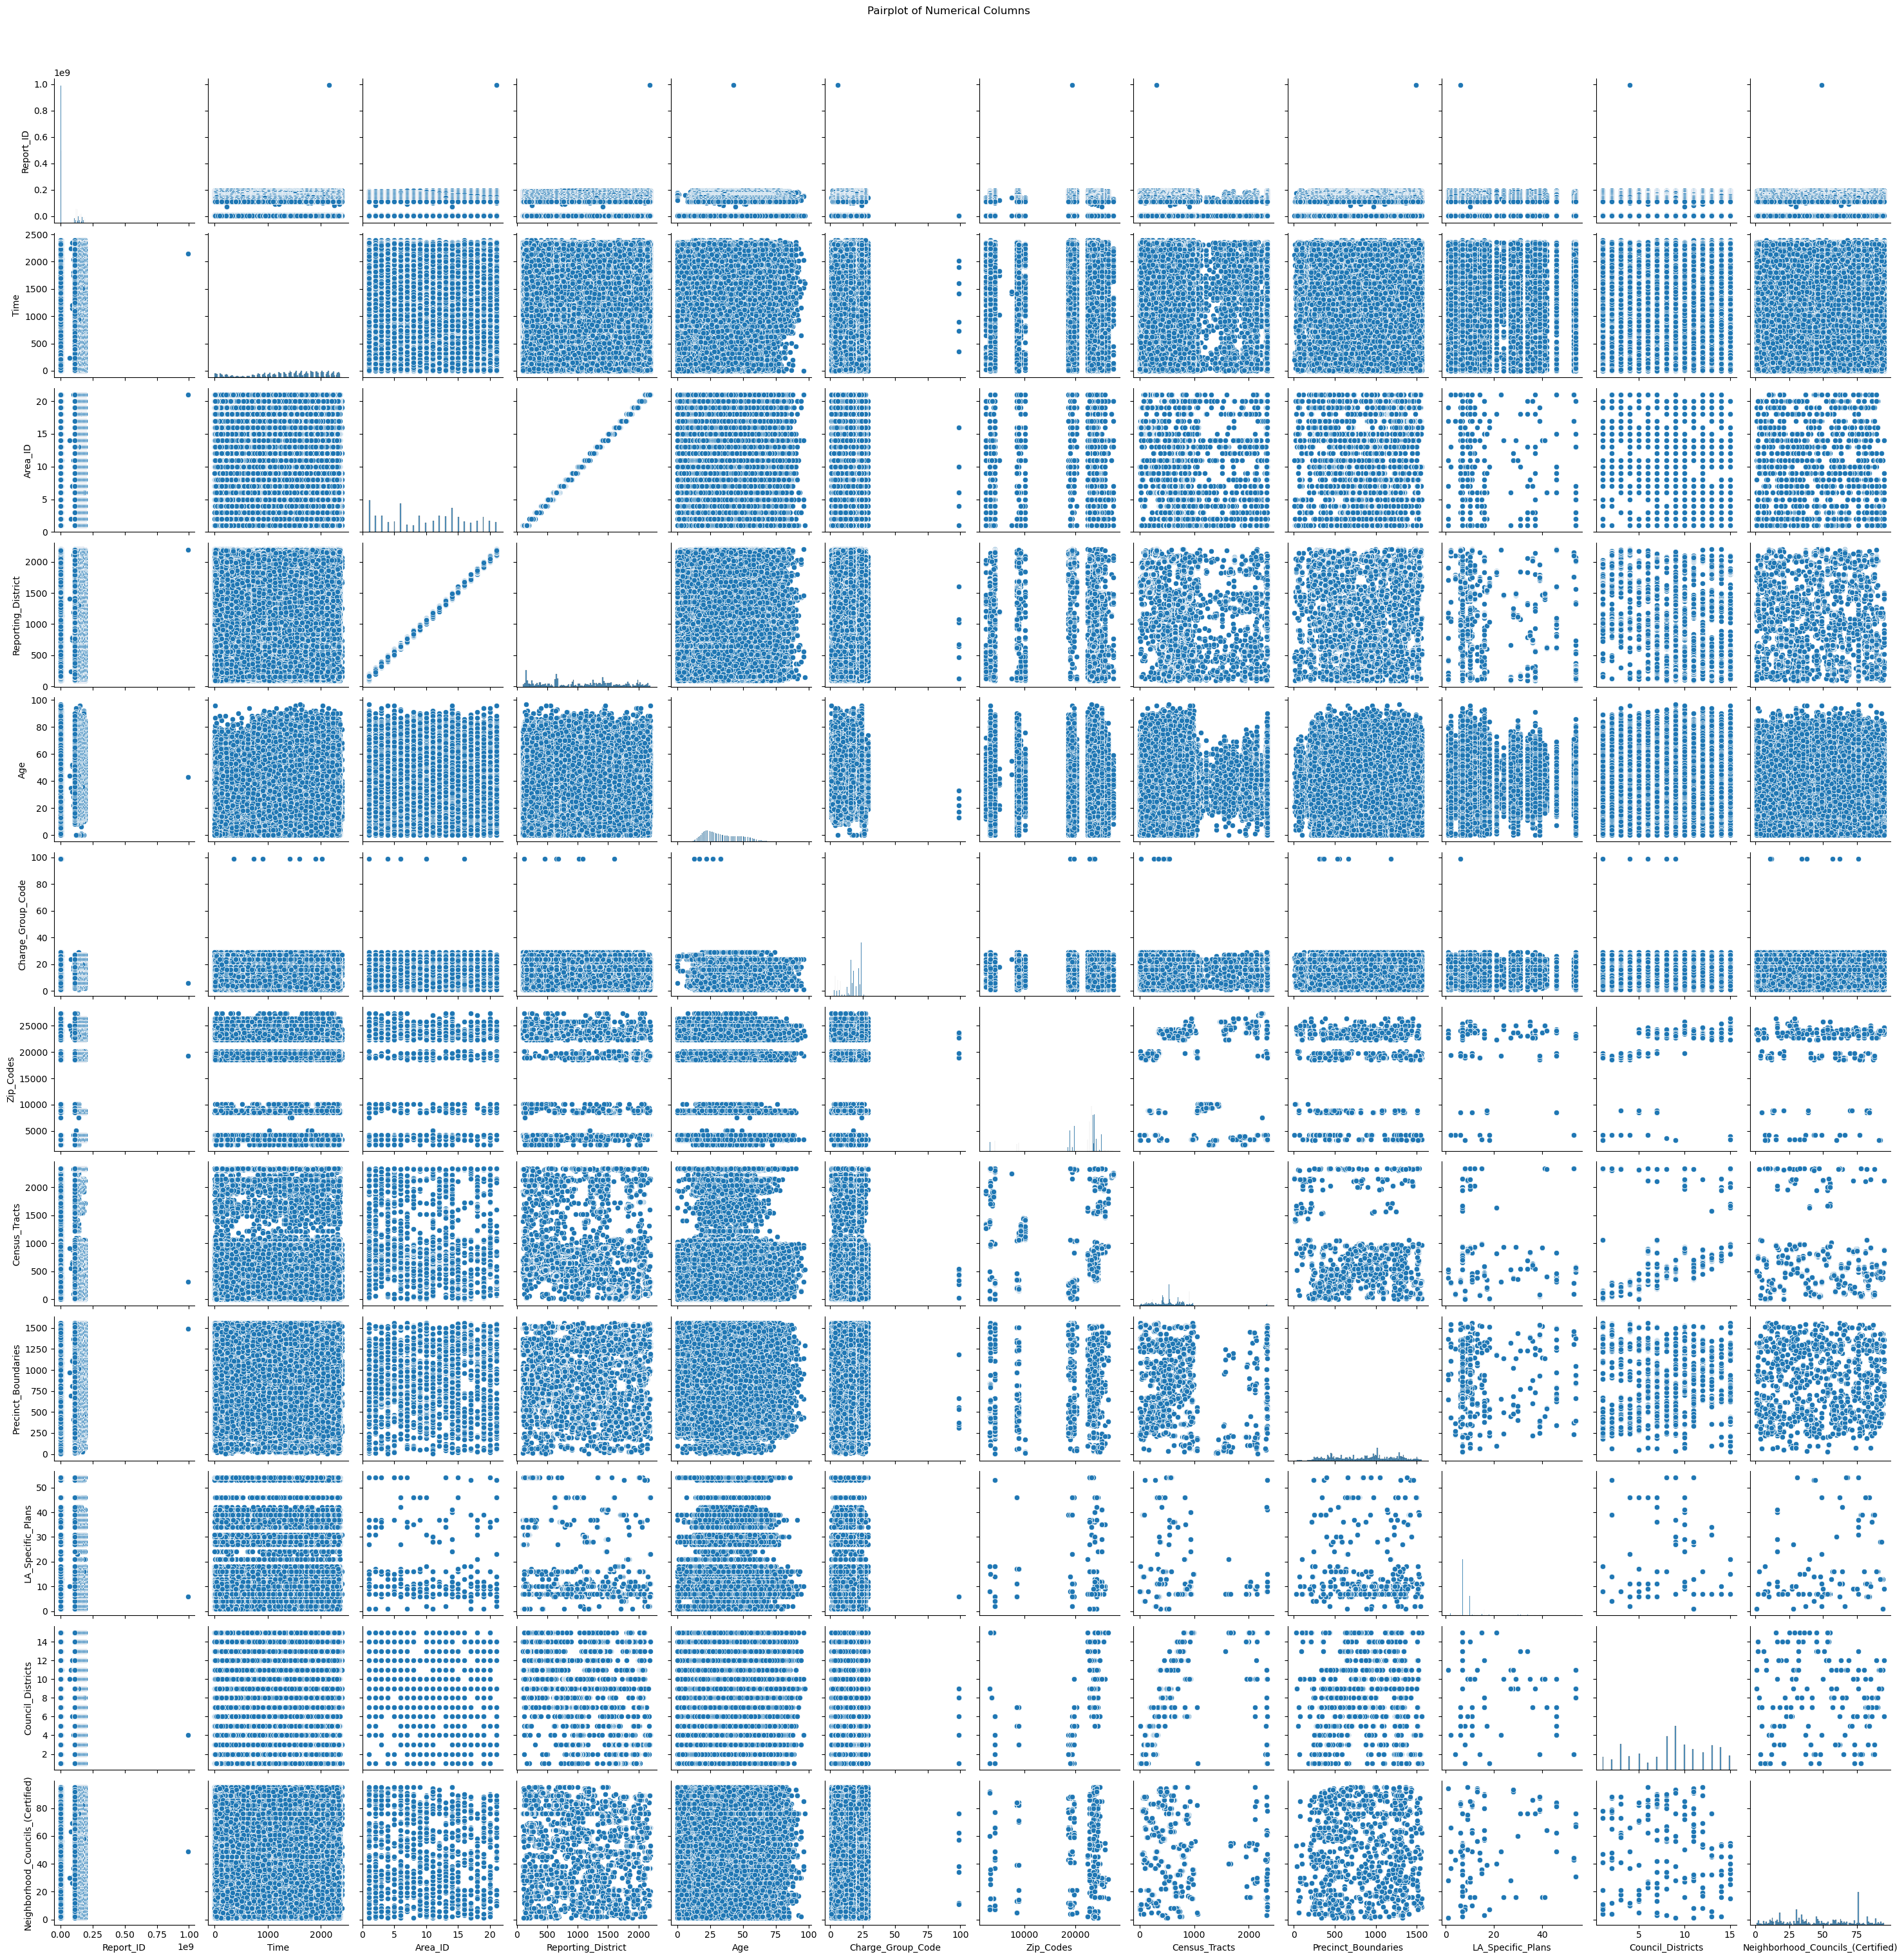

In [34]:
# Pairplot for numerical columns
sns.pairplot(df_arrests[numerical_columns])
plt.suptitle('Pairplot of Numerical Columns', y=1.02)
plt.show()


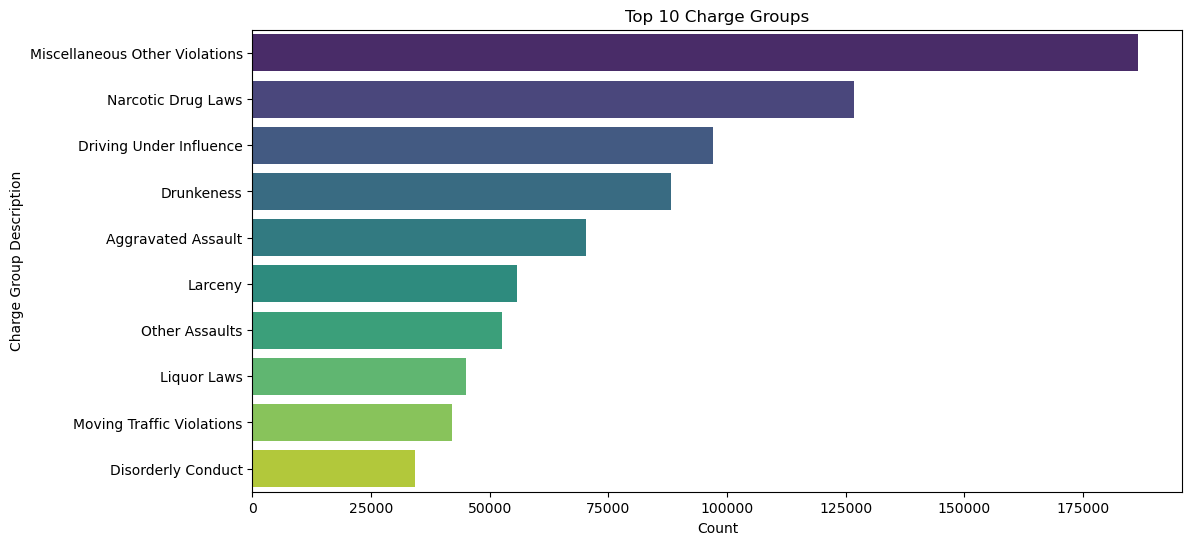

In [35]:
# Bar plot for top 10 'Charge_Group_Description'
top_charge_groups = df_arrests['Charge_Group_Description'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_charge_groups.values, y=top_charge_groups.index, palette='viridis')
plt.title('Top 10 Charge Groups')
plt.xlabel('Count')
plt.ylabel('Charge Group Description')
plt.show()

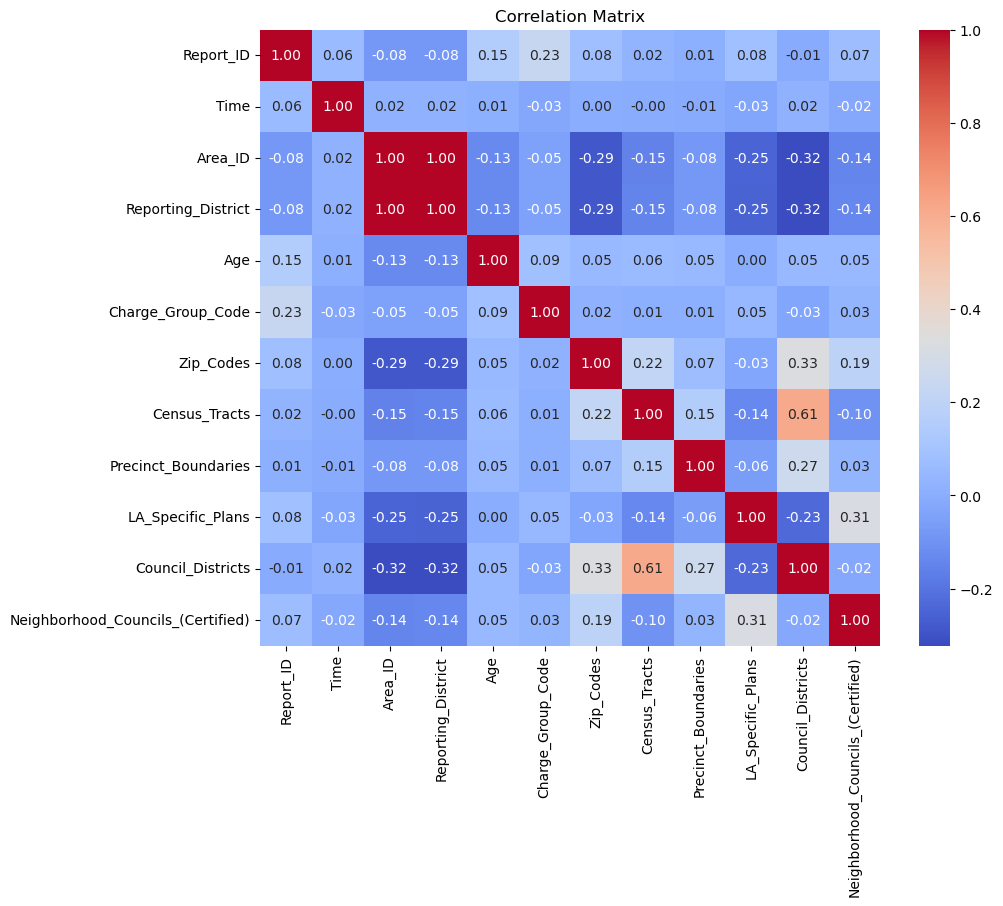

In [30]:
# Calculate correlation matrix
correlation_matrix = df_arrests.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


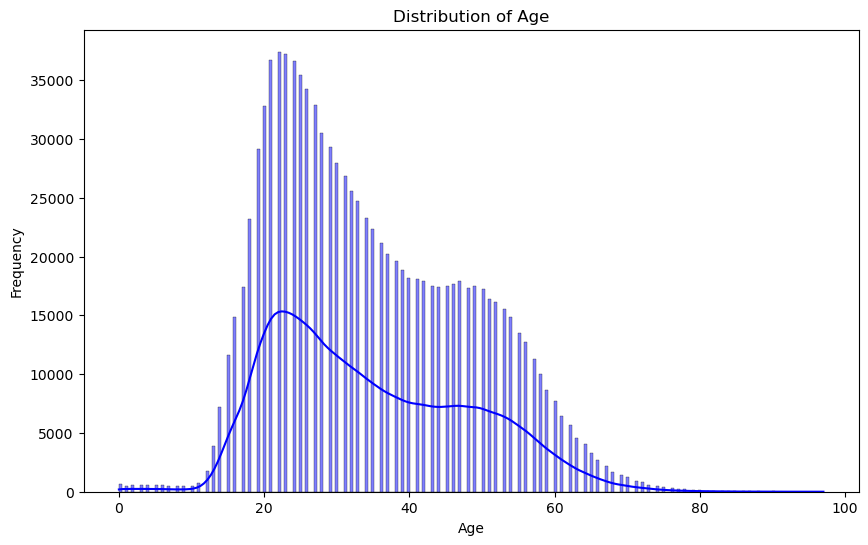

In [31]:
# Histogram and KDE plot of Age column
plt.figure(figsize=(10, 6))
sns.histplot(df_arrests['Age'], kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [32]:
# Calculating Skewness
# Calculate skewness for the 'Age' column
age_skewness = df_arrests['Age'].skew()
print("Skewness of Age column:", age_skewness)

if age_skewness > 0:
    print("The Age distribution is right-skewed.")
elif age_skewness < 0:
    print("The Age distribution is left-skewed.")
else:
    print("The Age distribution is symmetrical.")

Skewness of Age column: 0.5032542758008841
The Age distribution is right-skewed.


In [33]:
# Calculating kurtosis
# Calculate kurtosis for the 'Age' column
age_kurtosis = df_arrests['Age'].kurtosis()
print("Kurtosis of Age column:", age_kurtosis)

if age_kurtosis > 0:
    print("The Age distribution is leptokurtic (heavy-tailed).")
elif age_kurtosis < 0:
    print("The Age distribution is platykurtic (light-tailed).")
else:
    print("The Age distribution is mesokurtic (similar to normal distribution).")

Kurtosis of Age column: -0.5113770431542646
The Age distribution is platykurtic (light-tailed).
